## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `figure_cdf` 
### Created the cdfs by baf and canopy cover for manuscript figures 

* Making a copy of `5_cdf_by_canopycover` to adjust for figures ones

created by Cassie Lumbrazo\
last updated: Sept 2024\
run location: locally\
python environment: **cer_treatment**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

## Constants and Calculations to Run before any other sections

In [4]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

In [5]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

In [6]:
# First, just snow depth by DCE
ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

In [7]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [8]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

# CDFS

## Now, we just want to add one which is CDFs of DCE split by aspect

In [46]:
# mkae a north and a south version of all the dce_rapid_baf variables 
ds['dce_rapid_baf_new_1_s'] = ds['dce_rapid_baf_new_1'].where(ds['baf_ridge'] == 1) # leave gap, no BAF
ds['dce_rapid_baf_new_2_s'] = ds['dce_rapid_baf_new_2'].where(ds['baf_ridge'] == 1) # leave forest, no BAF
ds['dce_rapid_baf_new_17_s'] = ds['dce_rapid_baf_new_17'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_30_s'] = ds['dce_rapid_baf_new_30'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_60_s'] = ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_69_s'] = ds['dce_rapid_baf_new_69'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_80_s'] = ds['dce_rapid_baf_new_80'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_90_s'] = ds['dce_rapid_baf_new_90'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_140_s'] = ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_155_s'] = ds['dce_rapid_baf_new_155'].where(ds['baf_ridge'] == 1)

# make a north and a south version of all the dce_rapid_baf variables
ds['dce_rapid_baf_new_1_n'] = ds['dce_rapid_baf_new_1'].where(ds['baf_ridge'] == -1) # leave gap, no BAF
# ds['dce_rapid_baf_new_2_n'] = ds['dce_rapid_baf_new_2'].where(ds['baf_ridge'] == -1) # leave forest, no BAF 
ds['dce_rapid_baf_new_32_n'] = ds['dce_rapid_baf_new_32'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_38_n'] = ds['dce_rapid_baf_new_38'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_60_n'] = ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_82_n'] = ds['dce_rapid_baf_new_82'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_140_n'] = ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_150_n'] = ds['dce_rapid_baf_new_150'].where(ds['baf_ridge'] == -1) # leave forest, need to check the difference between 2 and 150 I think they are the same thing 
ds['dce_rapid_baf_new_155_n'] = ds['dce_rapid_baf_new_155'].where(ds['baf_ridge'] == -1)


C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\40927849.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


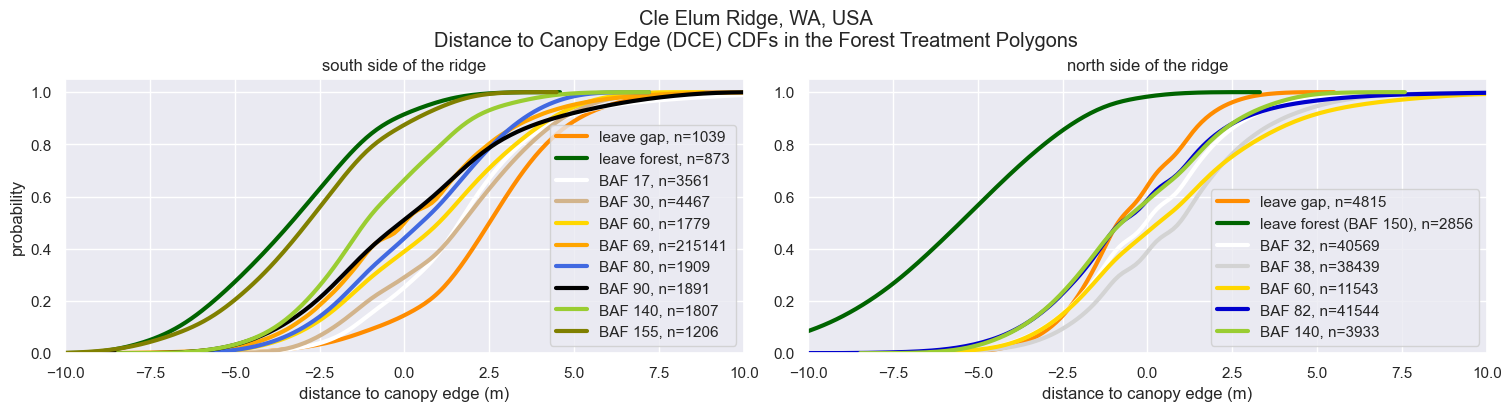

In [54]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['dce_rapid_baf_new_1_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_2_s'].values.flatten(), ax=axes[0], color='darkgreen', label=f'leave forest, n={np.unique(ds["dce_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_17_s'].values.flatten(), ax=axes[0], color='white', label=f'BAF 17, n={np.unique(ds["dce_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_30_s'].values.flatten(), ax=axes[0], color='tan', label=f'BAF 30, n={np.unique(ds["dce_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_s'].values.flatten(), ax=axes[0], color='gold', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_69_s'].values.flatten(), ax=axes[0], color='orange', label=f'BAF 69, n={np.unique(ds["dce_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_80_s'].values.flatten(), ax=axes[0], color='royalblue', label=f'BAF 80, n={np.unique(ds["dce_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_90_s'].values.flatten(), ax=axes[0], color='black', label=f'BAF 90, n={np.unique(ds["dce_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_s'].values.flatten(), ax=axes[0], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_s'].values.flatten(), ax=axes[0], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['dce_rapid_baf_new_1_n'].values.flatten(), ax=axes[1], color='darkorange', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_150_n'].values.flatten(), ax=axes[1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["dce_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_32_n'].values.flatten(), ax=axes[1], color='white', label=f'BAF 32, n={np.unique(ds["dce_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_38_n'].values.flatten(), ax=axes[1], color='lightgrey', label=f'BAF 38, n={np.unique(ds["dce_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_n'].values.flatten(), ax=axes[1], color='gold', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_82_n'].values.flatten(), ax=axes[1], color='mediumblue', label=f'BAF 82, n={np.unique(ds["dce_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_n'].values.flatten(), ax=axes[1], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-10, 10)

plt.suptitle('Cle Elum Ridge, WA, USA\nDistance to Canopy Edge (DCE) CDFs in the Forest Treatment Polygons')
axes[0].legend()
axes[1].legend()

plt.show()

## Now, put this together as a subplot with the snow depth CDFs too

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\3810793483.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[0,1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\3810793483.py:56: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1,1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\3810793483.py:59: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new

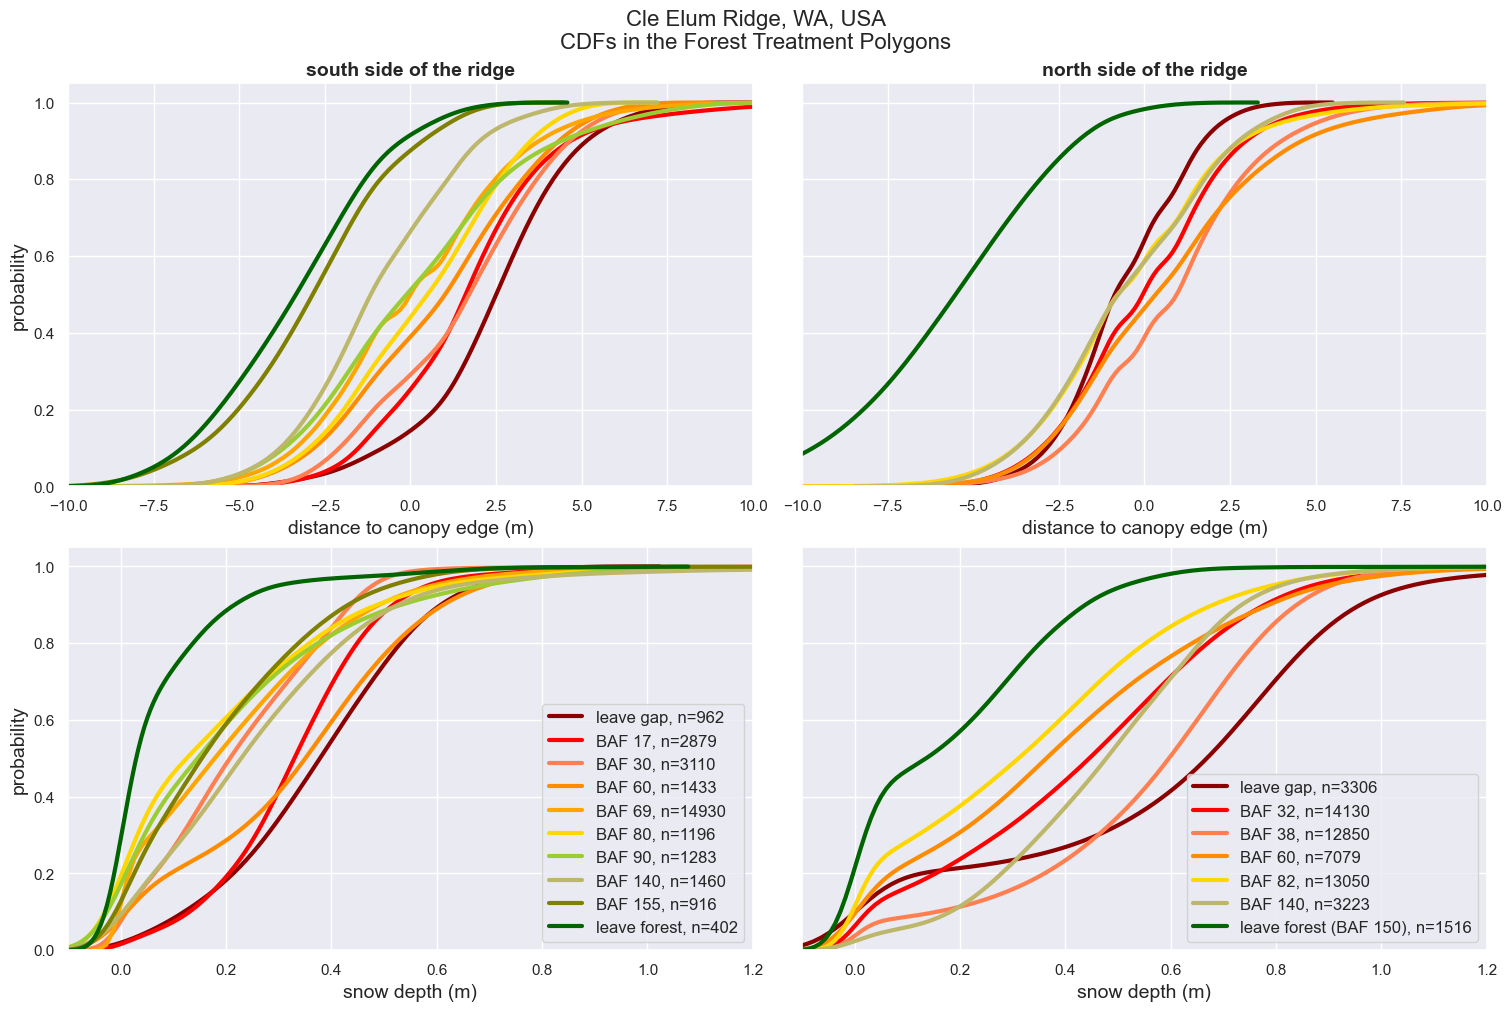

In [59]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 2, sharex='row', sharey=True, figsize=(15,10), constrained_layout = True)
alpha=0.7

# DISTANCE TO CANOPY EDGE ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# SOUTH
sns.kdeplot(ds['dce_rapid_baf_new_1_s'].values.flatten(), ax=axes[0,0], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_17_s'].values.flatten(), ax=axes[0,0], color='red', label=f'BAF 17, n={np.unique(ds["dce_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_30_s'].values.flatten(), ax=axes[0,0], color='coral', label=f'BAF 30, n={np.unique(ds["dce_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_s'].values.flatten(), ax=axes[0,0], color='darkorange', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_69_s'].values.flatten(), ax=axes[0,0], color='orange', label=f'BAF 69, n={np.unique(ds["dce_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_80_s'].values.flatten(), ax=axes[0,0], color='gold', label=f'BAF 80, n={np.unique(ds["dce_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_90_s'].values.flatten(), ax=axes[0,0], color='yellowgreen', label=f'BAF 90, n={np.unique(ds["dce_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_s'].values.flatten(), ax=axes[0,0], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_s'].values.flatten(), ax=axes[0,0], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_2_s'].values.flatten(), ax=axes[0,0], color='darkgreen', label=f'leave forest, n={np.unique(ds["dce_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['dce_rapid_baf_new_1_n'].values.flatten(), ax=axes[0,1], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_32_n'].values.flatten(), ax=axes[0,1], color='red', label=f'BAF 32, n={np.unique(ds["dce_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_38_n'].values.flatten(), ax=axes[0,1], color='coral', label=f'BAF 38, n={np.unique(ds["dce_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_n'].values.flatten(), ax=axes[0,1], color='darkorange', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_82_n'].values.flatten(), ax=axes[0,1], color='gold', label=f'BAF 82, n={np.unique(ds["dce_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_n'].values.flatten(), ax=axes[0,1], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[0,1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_150_n'].values.flatten(), ax=axes[0,1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["dce_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# SNOW DEPTH -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].values.flatten(), ax=axes[1,0], color='darkred', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].values.flatten(), ax=axes[1,0], color='red', label=f'BAF 17, n={np.unique(ds["hs_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].values.flatten(), ax=axes[1,0], color='coral', label=f'BAF 30, n={np.unique(ds["hs_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_s'].values.flatten(), ax=axes[1,0], color='darkorange', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].values.flatten(), ax=axes[1,0], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_80_s'].values.flatten(), ax=axes[1,0], color='gold', label=f'BAF 80, n={np.unique(ds["hs_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90_s'].values.flatten(), ax=axes[1,0], color='yellowgreen', label=f'BAF 90, n={np.unique(ds["hs_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_s'].values.flatten(), ax=axes[1,0], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].values.flatten(), ax=axes[1,0], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_2_s'].values.flatten(), ax=axes[1,0], color='darkgreen', label=f'leave forest, n={np.unique(ds["hs_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].values.flatten(), ax=axes[1,1], color='darkred', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].values.flatten(), ax=axes[1,1], color='red', label=f'BAF 32, n={np.unique(ds["hs_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].values.flatten(), ax=axes[1,1], color='coral', label=f'BAF 38, n={np.unique(ds["hs_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_n'].values.flatten(), ax=axes[1,1], color='darkorange', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1,1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].values.flatten(), ax=axes[1,1], color='gold', label=f'BAF 82, n={np.unique(ds["hs_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_n'].values.flatten(), ax=axes[1,1], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1,1], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_150_n'].values.flatten(), ax=axes[1,1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["hs_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')



# labels
axes[0,0].set_title('south side of the ridge', fontsize=14, fontweight='bold')
axes[0,1].set_title('north side of the ridge', fontsize=14, fontweight='bold')

axes[0,0].set_xlabel('distance to canopy edge (m)', fontsize=14)
axes[0,1].set_xlabel('distance to canopy edge (m)', fontsize=14)

axes[1,0].set_xlabel('snow depth (m)', fontsize=14)
axes[1,1].set_xlabel('snow depth (m)', fontsize=14)

axes[0,0].set_ylabel('probability', fontsize=14)
axes[0,1].set_ylabel('')

axes[1,0].set_ylabel('probability', fontsize=14)
axes[1,1].set_ylabel('')

axes[0,0].set_xlim(-10,10) # dce xlim
axes[1,0].set_xlim(-0.1,1.2) # snow depth xlim

plt.suptitle('Cle Elum Ridge, WA, USA\nCDFs in the Forest Treatment Polygons', fontsize=16)

# add an A) B, C, D, to the figures 
# axes[0,0].text(-9, 0.9, 'A)', fontsize=14)
# axes[0,1].text(-9, 0.9, 'B)', fontsize=14)
# axes[1,0].text(-0.08, 0.9, 'C)', fontsize=14)
# axes[1,1].text(-0.08, 0.9, 'D)', fontsize=14)

axes[1,0].legend(fontsize=12)
axes[1,1].legend(fontsize=12)

plt.show()

#### Snow depth CDFs 

Now, do this but break this up by side of the ridge 
* the variables for this are created in `1_update_netcdf.ipynb`

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\1892715673.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_32_s'].values.flatten(), ax=axes[0], color='white', label=f'BAF 32, n={np.unique(ds["hs_rapid_baf_new_32_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\1892715673.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_38_s'].values.flatten(), ax=axes[0], color='lightgrey', label=f'BAF 38, n={np.unique(ds["hs_rapid_baf_new_38_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\1892715673.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_82_s'

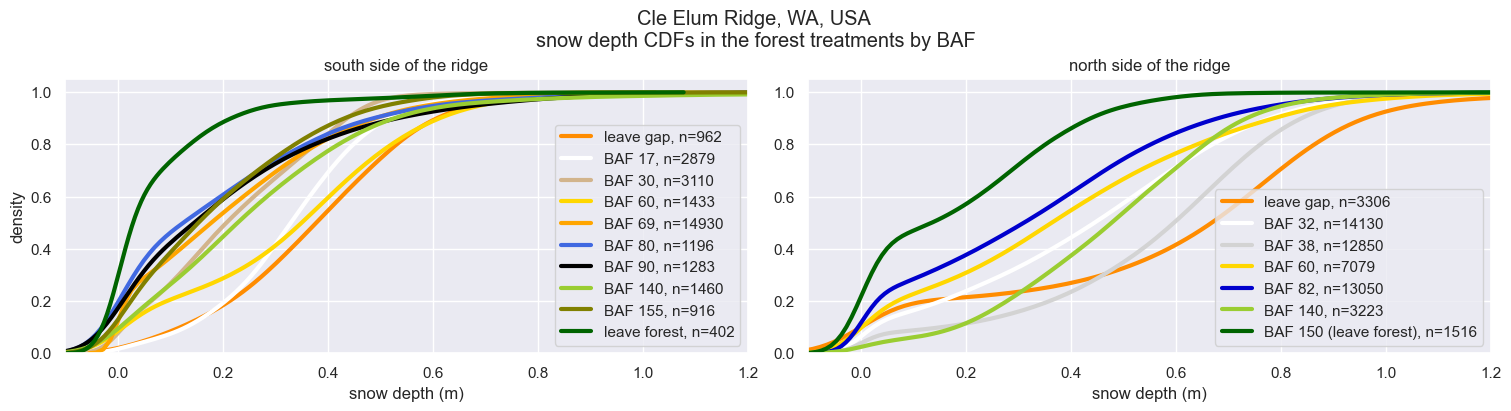

In [15]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].values.flatten(), ax=axes[0], color='white', label=f'BAF 17, n={np.unique(ds["hs_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].values.flatten(), ax=axes[0], color='tan', label=f'BAF 30, n={np.unique(ds["hs_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_s'].values.flatten(), ax=axes[0], color='gold', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].values.flatten(), ax=axes[0], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_80_s'].values.flatten(), ax=axes[0], color='royalblue', label=f'BAF 80, n={np.unique(ds["hs_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90_s'].values.flatten(), ax=axes[0], color='black', label=f'BAF 90, n={np.unique(ds["hs_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_s'].values.flatten(), ax=axes[0], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].values.flatten(), ax=axes[0], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].values.flatten(), ax=axes[1], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].values.flatten(), ax=axes[1], color='green', label=f'leave forest, n={np.unique(ds["hs_rapid_baf_new_2_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].values.flatten(), ax=axes[1], color='white', label=f'BAF 32, n={np.unique(ds["hs_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].values.flatten(), ax=axes[1], color='lightgrey', label=f'BAF 38, n={np.unique(ds["hs_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_n'].values.flatten(), ax=axes[1], color='gold', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].values.flatten(), ax=axes[1], color='mediumblue', label=f'BAF 82, n={np.unique(ds["hs_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_n'].values.flatten(), ax=axes[1], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].values.flatten(), ax=axes[1], color='darkgreen', label=f'BAF 150 (leave forest), n={np.unique(ds["hs_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.2)

plt.suptitle('Cle Elum Ridge, WA, USA \nsnow depth CDFs in the forest treatments by BAF')
axes[0].legend()
axes[1].legend()

plt.show()